In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 as cv

In [173]:
def co_ocurrencia_matriz(img, distance, theta, normalizar = False):
    M = np.zeros((256,256), dtype = float)
    m, n = img.shape
    if theta == 0:
        horizontal_step  = distance
        vertical_step = 0
    elif theta == 45:
        horizontal_step = distance
        vertical_step = distance
    elif theta == 90:
        horizontal_step = 0
        vertical_step = distance
    elif theta == 135:
        horizontal_step = -distance
        vertical_step = distance
    for i in range(m):
        for j in range(n):
            try :
                x = i + vertical_step
                y = j + horizontal_step
                if x >= 0 and y >= 0 :
                    p1 = int(img[i,j])
                    p2 = int(img[i + vertical_step, j + horizontal_step])
                    M[p1][p2] += 1
            except IndexError:
                j = n
    if normalizar:
        return M/M.sum()
    return M

In [174]:
def sum_hist(img, d, theta, plot):
    H = np.zeros(511)
    m, n = img.shape
    if theta == 0:
        horizontal_step  = distance
        vertical_step = 0
    elif theta == 45:
        horizontal_step = distance
        vertical_step = distance
    elif theta == 90:
        horizontal_step = 0
        vertical_step = distance
    elif theta == 135:
        horizontal_step = -distance
        vertical_step = distance
    for i in range(m):
        for j in range(n):
            try :
                p1 = int(img[i,j])
                p2 = int(img[i + vertical_step,j + horizontal_step])
                H[p1+p2] += 1
            except IndexError:
                j = n
    if plot:
        plt.plot(range(len(H)), H[0:len(H)])
    return H


def res_hist(img, d, theta, plot):
    H = np.zeros(511)
    m, n = img.shape
    if theta == 0:
        horizontal_step  = distance
        vertical_step = 0
    elif theta == 45:
        horizontal_step = distance
        vertical_step = distance
    elif theta == 90:
        horizontal_step = 0
        vertical_step = distance
    elif theta == 135:
        horizontal_step = -distance
        vertical_step = distance
    for i in range(m):
        for j in range(n):
            try :
                p1 = int(img[i,j])
                p2 = int(img[i + vertical_step,j + horizontal_step])
                H[p1 - p2 + 255] += 1
            except IndexError:
                j = n
    if plot:
        plt.plot(range(len(H)), H[0:len(H)])
    return H


def sum_diff_histogram(img, distance, plot):
    Hs = sum_hist(img, distance, plot)
    Hd = res_hist(img, distance, plot)
    return Hs, Hd

In [211]:
lista = [1,2, 3, 4, 3, 10]
suma = sum(lista)
lista_norm = [x/suma for x in lista]
sum(lista_norm)


1.0

In [218]:
def get_descriptors_glcm(G, main_descriptors = True):
    m, n = G.shape
    asm = 0
    ent = 0
    con = 0
    dis = 0
    hom = 0
    mu = 0
    for i in range(m):
        for j in range(n):
            asm += G[i,j]**2
            ent -= G[i,j]*math.log(G[i,j] + 1)
            con += G[i,j]*(i-j)**2
            dis += G[i,j]*abs(i-j)
            hom += (1/(1+ (i-j)**2))*G[i,j]
            mu += i*G[i,j]
    ene = (asm)**0.5
    cor = 0
    var = 0
    csha = 0
    cpro = 0
    for i in range(m):
        for j in range(n):
            cor += (i-mu)*(j-mu)*G[i,j]
            var += G[i,j]*(i-mu)**2
            csha += G[i,j]*(i+j-2*mu)**3
            cpro += G[i,j]*(i+j-2*mu)**4
    if main_descriptors:
        descriptors = [con, dis, hom, ene, cor, asm]
        suma = sum(descriptors)
        descriptors_norm = [x/suma for x in descriptors]
        return descriptors_norm
    else:
        return [asm, ene, ent, con, dis, hom, mu, cor, var, csha, cpro]

In [5]:
def get_descriptors_sdh(Hs, Hd):
    m = len(Hs)
    n = len(Hd)
    asm = 0
    ent = 0
    con = 0
    dis = 0
    hom = 0
    mu = 0
    cor = 0
    for i in range(m):
        asm += (Hs[i]**2)*(Hd[i]**2)
        ent += -(Hs[i]*math.log(Hs[i] + 1)) - (Hd[i]*math.log(Hd[i] + 1))
        con += Hd[i] * (i**2)
        dis += Hd[i] * abs(i)
        hom += Hd[i] * (1/(1+i**2))
        mu += 0.5 * ((i*Hs[i]) + (i*Hd[i]))
        var += 0.5*((Hs[j]*(j-2*mu)**2) + (Hd[j]*(j)**2))
        #cor += 
    ene = (asm)**0.5
    #cor = 0
    var = 0
    csha = 0
    cpro = 0
    for j in range(n):
        cor += 0.5*((Hs[j]*(j-2*mu)**2) - (Hd[j]*(j)**2))
        var += 0.5*((Hs[j]*(j-2*mu)**2) + (Hd[j]*(j)**2))
        csha += Hs[j]*(j-2*mu)**3
        cpro += Hs[j]*(j-2*mu)**4
    return [asm]

In [213]:
# Definimos la ruta
path = '/home/vega/Escritorio/vision_artificial/Ingeniería de Calidad-20230520T201236Z-001/Ingeniería de Calidad/Images/Texture/Colored_Brodatz/Colored Brodatz/'
# Obtenemos la matriz de co-ocurrencia de cada imagen
GLCM_1_0 = []
GLCM_1_45 = []
GLCM_1_90 = []
GLCM_1_135 = []
for k in range(1,113):
    image_name = path + 'D' + str(k) + '_COLORED.tif'
    img = cv.imread(image_name, cv.IMREAD_GRAYSCALE)
    GLCM_1_0.append(co_ocurrencia_matriz(img, 1, 0, True))
    GLCM_1_45.append(co_ocurrencia_matriz(img, 1, 45, True))
    GLCM_1_90.append(co_ocurrencia_matriz(img, 1, 90, True))
    GLCM_1_135.append(co_ocurrencia_matriz(img, 1, 135, True))

In [219]:
# Obtenemos las características para cada imagen a partir de su matriz de co-ocurrencia
num_matrices = len(GLCM_1_0)
features_from_glcm_0 = []
features_from_glcm_45 = []
features_from_glcm_90 = []
features_from_glcm_135 = []
for i in range(num_matrices):
    features_from_glcm_0.append(get_descriptors_glcm(GLCM_1_0[i]))
    features_from_glcm_45.append(get_descriptors_glcm(GLCM_1_45[i]))
    features_from_glcm_90.append(get_descriptors_glcm(GLCM_1_90[i]))
    features_from_glcm_135.append(get_descriptors_glcm(GLCM_1_135[i]))

In [220]:
features_from_glcm_0

[[0.21669769518682216,
  0.00825060038572338,
  0.00026514748425609353,
  6.985102516698914e-05,
  0.7747121885542512,
  4.517363780158145e-06],
 [0.21520074581394089,
  0.010262901268815072,
  0.00015587740581960344,
  4.19322878219723e-05,
  0.7743367349690528,
  1.8082545498853827e-06],
 [0.3948589018872375,
  0.011777475230299796,
  0.00018879249520146134,
  9.74362391065224e-05,
  0.5930662721013616,
  1.1122046792997668e-05],
 [0.39870137758289703,
  0.011029630183371717,
  5.261954334287421e-05,
  1.4267833804175793e-05,
  0.5902017484262045,
  3.56430379799713e-07],
 [0.13928720049360893,
  0.005279282067991724,
  8.256047073497496e-05,
  1.8691689559199357e-05,
  0.8553315120883962,
  7.531897089988091e-07],
 [0.673079529654922,
  0.010873110125244539,
  0.00016726528052947066,
  6.478376333840802e-05,
  0.31580893125186915,
  6.379924096263466e-06],
 [0.1240437718885282,
  0.004436110602983865,
  0.00015810487651294778,
  7.359425894183178e-05,
  0.8712774562166437,
  1.09621

In [202]:
def euclidean_distance(s, k):
    m = len(s)
    d = 0
    for i in range(m):
        d += (s[i] - k[i])**2
    return d

def L1_norm(s, k):
    m = len(s)
    L1 = 0
    for i in range(m):
        L1 += abs(s[i] - k[i])
    return L1

def bhattacharyya_distance(s, k):
    m = len(s)
    B = 0
    for i in range(m):
        B += (s[i]*k[i])**0.5
    return -math.log(B)

def get_distance_matrix(feature_vector, distance):
    size = len(feature_vector)
    distance_matrix = np.zeros((size, size))
    if distance == 'euclidean':
        get_distance = euclidean_distance
    elif distance == 'L1':
        get_distance = L1_norm
    elif distance == 'bhattacharyya':
        get_distance = bhattacharyya_distance
    for i in range(size):
        for j in range(size):
            distance_matrix[i][j] = round(get_distance(feature_vector[i], feature_vector[j]), 2) 
    return distance_matrix

In [221]:
distance_matrix = get_distance_matrix(features_from_glcm_0, 'euclidean')

In [222]:
for i in range(len(distance_matrix)):
    print(distance_matrix[i,:])

[0.   0.   0.06 0.07 0.01 0.42 0.02 0.03 0.17 0.12 0.04 0.02 0.   0.33
 0.12 0.72 0.08 0.02 0.01 0.   0.56 0.03 0.04 0.23 0.02 0.01 0.03 0.
 0.04 0.07 0.06 0.2  0.08 0.   0.02 0.04 0.03 0.05 0.   0.   0.06 0.01
 0.   0.   0.01 0.05 0.02 0.09 0.09 0.   0.01 0.01 0.2  0.01 0.02 0.06
 0.01 0.03 0.07 0.   0.02 0.07 0.02 0.   0.01 0.   0.   0.22 0.01 0.01
 0.01 0.   0.   0.02 0.04 0.08 0.18 0.27 0.29 0.11 0.07 0.09 0.1  0.
 0.09 0.   0.   0.08 0.05 0.08 0.09 0.03 0.27 0.   0.03 0.02 0.02 0.03
 0.05 0.01 0.01 0.01 0.01 0.01 1.12 1.18 0.   0.   0.2  0.18 0.01 0.  ]
[0.   0.   0.07 0.07 0.01 0.42 0.02 0.03 0.17 0.12 0.04 0.02 0.   0.33
 0.12 0.72 0.08 0.02 0.01 0.   0.56 0.03 0.04 0.23 0.02 0.01 0.03 0.
 0.04 0.07 0.06 0.2  0.08 0.   0.02 0.04 0.03 0.05 0.   0.   0.06 0.01
 0.   0.   0.01 0.05 0.02 0.09 0.08 0.   0.01 0.01 0.2  0.01 0.02 0.06
 0.01 0.03 0.07 0.   0.02 0.07 0.02 0.   0.01 0.   0.   0.22 0.01 0.01
 0.01 0.   0.   0.02 0.04 0.08 0.18 0.27 0.29 0.11 0.07 0.09 0.1  0.
 0.09 0.   0.

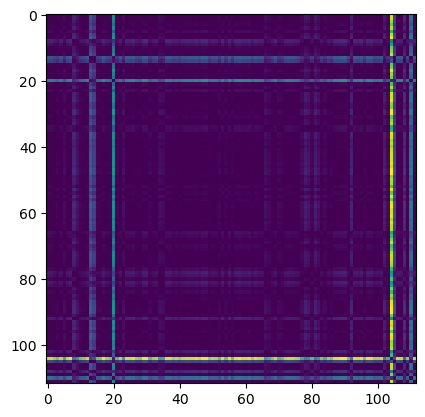

In [182]:
plt.imshow(distance_matrix)

Text(0, 0.5, 'Color bar')

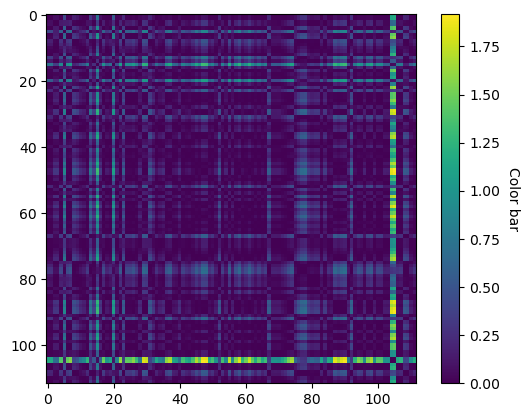

In [223]:
fig, ax = plt.subplots()
im = ax.imshow(distance_matrix)
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

Text(0, 0.5, 'Color bar')

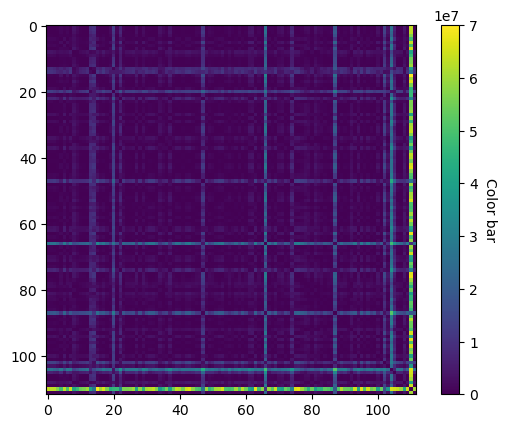

In [205]:
fig, ax = plt.subplots()
im = ax.imshow(distance_matrix)
cbar = ax.figure.colorbar(im, ax = ax)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

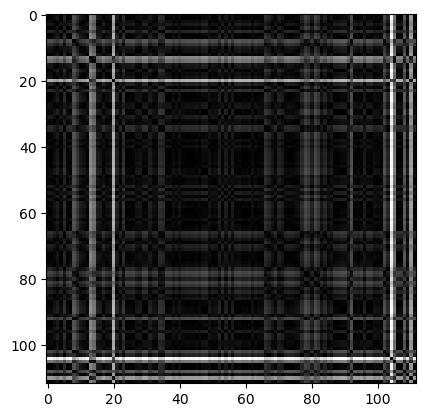

In [150]:
plt.imshow(distance_matrix, cmap="gray")

In [13]:
N = np.array([0, 2, 3, 4, 9, 10, 21, 1, 2, 0])
np.argsort(N)[:3]

array([0, 9, 7])

In [155]:
distance_matrix[0,:]

array([0.00000000e+00, 4.36320000e+02, 6.86555500e+04, 2.47595610e+05,
       9.94323000e+03, 6.76659450e+05, 2.54541000e+03, 1.53013400e+04,
       2.78851976e+06, 1.26183496e+06, 2.32755740e+05, 1.05176300e+05,
       1.36485000e+03, 7.74383111e+06, 5.38359358e+06, 2.63992340e+05,
       1.68185470e+05, 1.40619400e+04, 6.15088700e+04, 1.56614080e+05,
       1.29537917e+07, 4.09246370e+05, 1.21126700e+04, 8.80245690e+05,
       5.48000000e+00, 3.26800000e+01, 8.47589000e+03, 8.32650200e+04,
       1.32588890e+05, 1.97167700e+04, 2.42431300e+04, 3.10006520e+05,
       6.28883600e+04, 2.04559800e+04, 8.46106240e+05, 6.53126790e+05,
       3.55389000e+03, 1.76309000e+03, 4.92737100e+04, 3.52136000e+03,
       8.23102700e+04, 3.22681000e+03, 2.45250000e+02, 7.87300000e+01,
       7.38600000e+01, 7.37459000e+03, 3.86802000e+03, 2.82448700e+04,
       3.41087100e+04, 9.35815800e+04, 1.26350500e+04, 2.93967300e+04,
       3.70730740e+05, 5.77432000e+03, 2.65856520e+05, 9.36002000e+03,
      

In [206]:
def KNN(D, k):
    m, n = D.shape
    N = np.zeros((m,k))
    DN = np.zeros((m,k))
    for i in range(m):
        knn = np.argsort(D[i,:])[:k+1]
        N[i] = knn[1:]
    return N

In [197]:
KNN(distance_matrix, 3)

array([[  0.,  24.,  25.],
       [  1.,  73.,  44.],
       [  2.,  32.,  76.],
       [  3.,  71.,  10.],
       [  4.,  22.,  72.],
       [  5.,  35.,  77.],
       [  6.,  69.,  41.],
       [  7.,  97.,  95.],
       [  8.,  92., 108.],
       [  9.,  82.,  79.],
       [ 10.,  96.,   3.],
       [ 11.,  49.,  27.],
       [ 12., 107., 101.],
       [ 13., 105., 110.],
       [ 14., 105.,  13.],
       [ 15.,  54.,  71.],
       [ 16.,  86.,  19.],
       [ 17.,  95.,   7.],
       [ 18.,  76.,  32.],
       [ 19.,  83.,  16.],
       [ 20., 110.,  13.],
       [ 21.,  80.,  52.],
       [ 22.,  72.,  50.],
       [ 23.,  34.,  66.],
       [ 24.,   0.,  25.],
       [ 25.,  59.,  60.],
       [ 26.,  61.,  57.],
       [ 27.,  40.,  49.],
       [ 28., 109.,  68.],
       [ 29.,  58.,  30.],
       [ 30.,  58.,  47.],
       [ 31.,  54.,  15.],
       [ 32.,  18.,  76.],
       [ 33.,  75.,  65.],
       [ 34.,  23.,  66.],
       [ 35.,  77.,   5.],
       [ 36.,  87.,  63.],
 

In [207]:
KNN(distance_matrix, 3)

array([[106.,  42.,  39.],
       [ 59., 106.,  39.],
       [ 32.,  40., 109.],
       [ 28.,  10.,  80.],
       [ 64.,  46.,   6.],
       [ 77.,  67.,  52.],
       [ 46.,  73.,  64.],
       [ 97.,  93.,  53.],
       [108.,  81.,  79.],
       [ 82.,  79.,  35.],
       [ 91.,  80.,  11.],
       [ 18.,  99.,  28.],
       [107., 111.,  57.],
       [108.,  20.,   8.],
       [ 81.,  13., 108.],
       [ 76., 109.,   5.],
       [ 40.,  28.,   3.],
       [ 95.,  53.,  97.],
       [ 11.,  33.,  99.],
       [ 83.,  49.,  86.],
       [ 13., 105., 108.],
       [ 35.,  54.,  56.],
       [ 74.,  47.,  62.],
       [ 67.,  77.,  52.],
       [ 41.,  25.,  36.],
       [ 24.,  44.,  41.],
       [ 57.,  30.,  48.],
       [100.,  71.,  94.],
       [  3.,  99.,  11.],
       [ 55.,  94.,  58.],
       [ 26.,  57.,  48.],
       [ 52., 109.,  67.],
       [  2.,  40., 109.],
       [ 65.,  18.,  44.],
       [103.,  70.,  71.],
       [ 21.,  82.,  54.],
       [ 60.,  98.,  24.],
 

In [224]:
KNN(distance_matrix, 3)

array([[ 38.,  39.,  42.],
       [ 38.,  39.,  42.],
       [ 84.,  82.,  28.],
       [ 84.,  82.,  28.],
       [ 44.,  36.,  46.],
       [ 20.,  78.,  13.],
       [ 27.,  26.,  25.],
       [ 46.,  45.,  57.],
       [ 67.,  76., 109.],
       [ 82., 109.,  16.],
       [ 80.,  34.,  28.],
       [ 68.,  18.,  34.],
       [ 38.,  41.,  42.],
       [ 13.,  92.,  78.],
       [ 82.,  81.,  16.],
       [ 20.,   5., 104.],
       [ 82.,  79.,  84.],
       [ 46.,  44.,  57.],
       [ 54.,  18.,  51.],
       [ 38.,  39.,  42.],
       [ 15.,   5.,  13.],
       [ 69.,  68.,  28.],
       [ 37.,  36.,  57.],
       [ 67.,  31., 109.],
       [ 44.,  46.,  50.],
       [ 36.,  44.,  46.],
       [ 46.,  45.,  57.],
       [ 27.,  41.,  42.],
       [ 80.,  34.,  28.],
       [ 45.,  58.,  37.],
       [ 45.,  58.,  37.],
       [ 31., 109., 108.],
       [ 82.,  32.,  84.],
       [ 38.,  39.,  42.],
       [ 70.,  35.,  68.],
       [ 54.,  80.,  91.],
       [ 46.,  45.,  57.],
 

In [17]:
from skimage.feature import graycomatrix, graycoprops
from skimage import data

In [191]:
ruta = '/home/vega/Escritorio/vision_artificial/Ingeniería de Calidad-20230520T201236Z-001/Ingeniería de Calidad/Images/Texture/Colored_Brodatz/Colored Brodatz/D112_COLORED.tif'
imagen = cv.imread(ruta, cv.IMREAD_GRAYSCALE)
imagen

array([[144, 151, 143, ..., 165, 164, 164],
       [150, 157, 157, ..., 162, 164, 162],
       [146, 162, 157, ..., 157, 162, 162],
       ...,
       [101, 109,  90, ..., 147, 146, 156],
       [ 76,  88,  82, ..., 147, 153, 150],
       [ 82,  76,  70, ..., 150, 150, 153]], dtype=uint8)

In [192]:
glcm = graycomatrix(imagen, distances = [1],angles=[0], normed = True)
glcm.shape
matriz_glcm = glcm[:,:,0,0]
#for i in range(256):
#    print(matriz_glcm[i,:])

In [193]:
my_matrix_glcm = co_ocurrencia_matriz(imagen, 1, 0, True)
#for i in range(256):
#    print(my_matrix_glcm[i,:])

In [194]:
print((matriz_glcm == my_matrix_glcm ).all()) 

True


In [195]:
features_glcm = graycoprops(glcm,'correlation')
features_glcm

array([[0.88194295]])

In [196]:
features_my_glcm = get_descriptors_glcm(my_matrix_glcm)
features_my_glcm

[257.8274574530514,
 10.34403120109544,
 0.2097992895455189,
 0.06778798313241005,
 0.8816340016844673,
 0.004595210657159909]